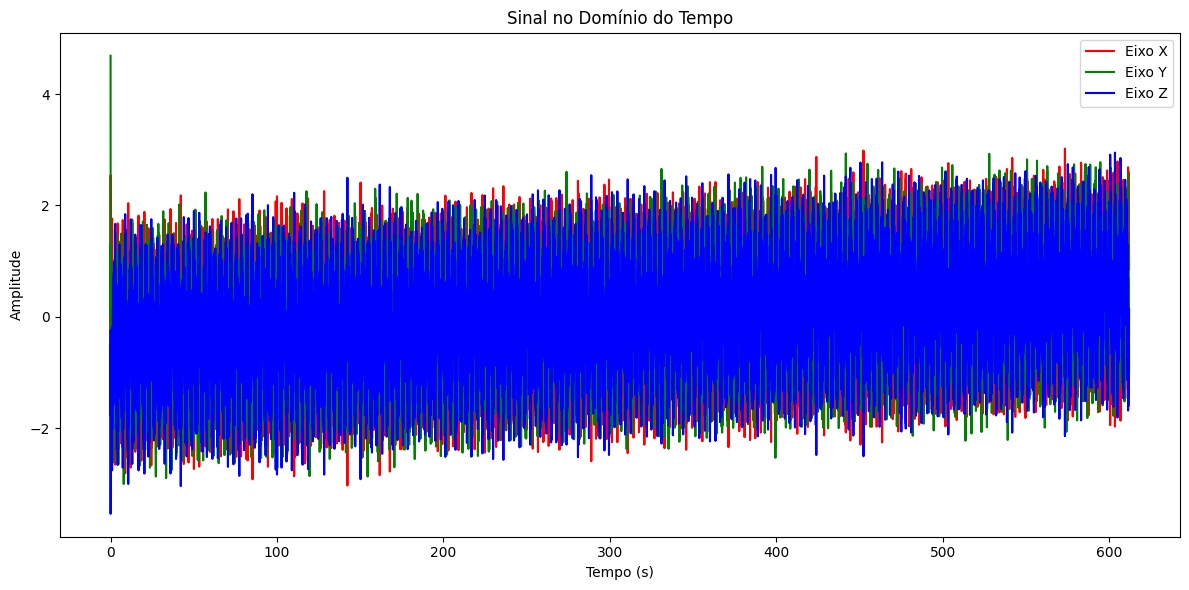

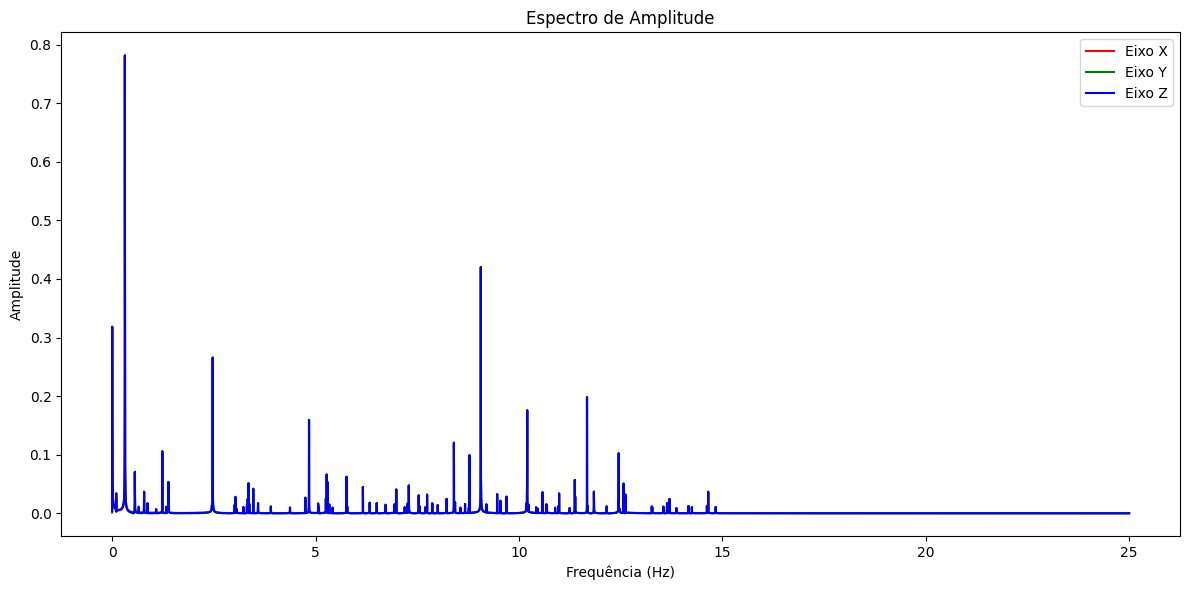

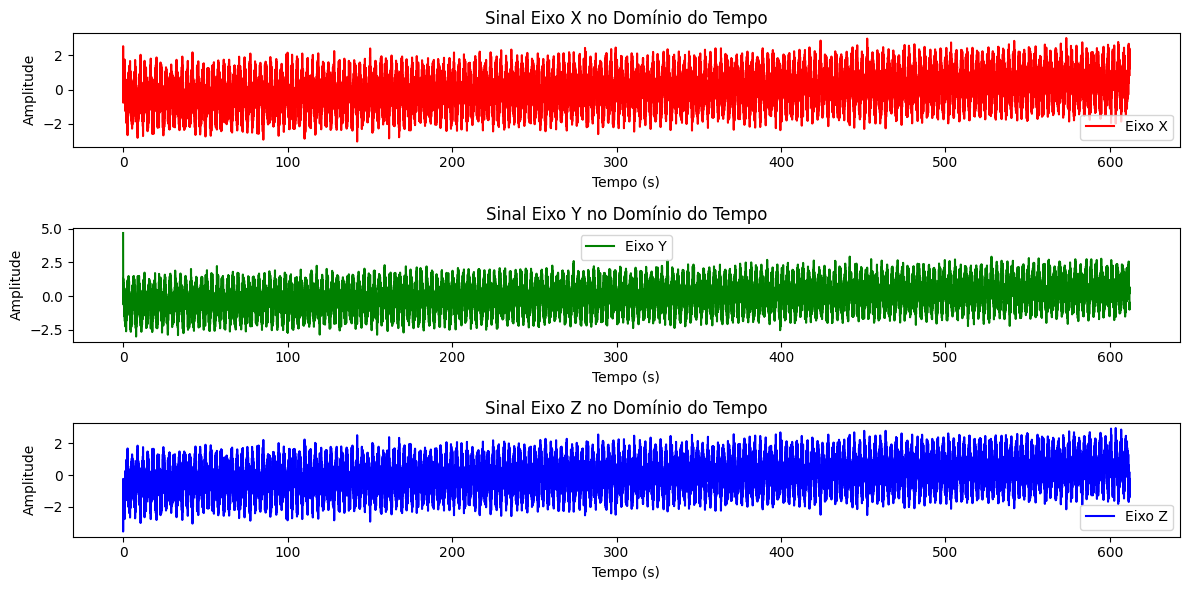

In [16]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

# simulation parameters
srate = 50  # in Hz
npnts = srate * 612  # 612 seconds
time = np.arange(0, npnts) / srate

# Generate 100 random frequencies in the range 0.1 to 10 Hz
num_freqs = 100
frex = np.random.uniform(0.1, 15, num_freqs)

# Criação de tendência linear para simular drift
trend = np.linspace(-0.5, 0.5, len(time))

signal_x = np.zeros(len(time))
signal_y = np.zeros(len(time))
signal_z = np.zeros(len(time))

# loop over frequencies to create signal
for fi in range(0, len(frex)):
    signal_x = signal_x + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time)
    signal_y = signal_y + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time + np.pi/2)  # Fase de 90 graus para eixo y
    signal_z = signal_z + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time + np.pi)  # Fase de 180 graus para eixo z

# Adicionando tendência aos sinais
signal_x = signal_x + trend
signal_y = signal_y + trend
signal_z = signal_z + trend

# amplitude spectrum via Fourier transform
signalX_x = scipy.fftpack.fft(signal_x)
signalX_y = scipy.fftpack.fft(signal_y)
signalX_z = scipy.fftpack.fft(signal_z)

signalAmp_x = 2 * np.abs(signalX_x) / npnts
signalAmp_y = 2 * np.abs(signalX_y) / npnts
signalAmp_z = 2 * np.abs(signalX_z) / npnts

# vector of frequencies in Hz
hz = np.linspace(0, srate / 2, int(np.floor(npnts / 2) + 1))

# Plotar os sinais no domínio do tempo
plt.figure(figsize=(12, 6))
plt.plot(time, signal_x, label='Eixo X', color='r')
plt.plot(time, signal_y, label='Eixo Y', color='g')
plt.plot(time, signal_z, label='Eixo Z', color='b')
plt.title('Sinal no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Plotar os espectros de amplitude
plt.figure(figsize=(12, 6))
plt.plot(hz, signalAmp_x[:len(hz)], label='Eixo X', color='r')
plt.plot(hz, signalAmp_y[:len(hz)], label='Eixo Y', color='g')
plt.plot(hz, signalAmp_z[:len(hz)], label='Eixo Z', color='b')
plt.title('Espectro de Amplitude')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Plotar os sinais individuais no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time, signal_x, label='Eixo X', color='r')
plt.title('Sinal Eixo X no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, signal_y, label='Eixo Y', color='g')
plt.title('Sinal Eixo Y no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, signal_z, label='Eixo Z', color='b')
plt.title('Sinal Eixo Z no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


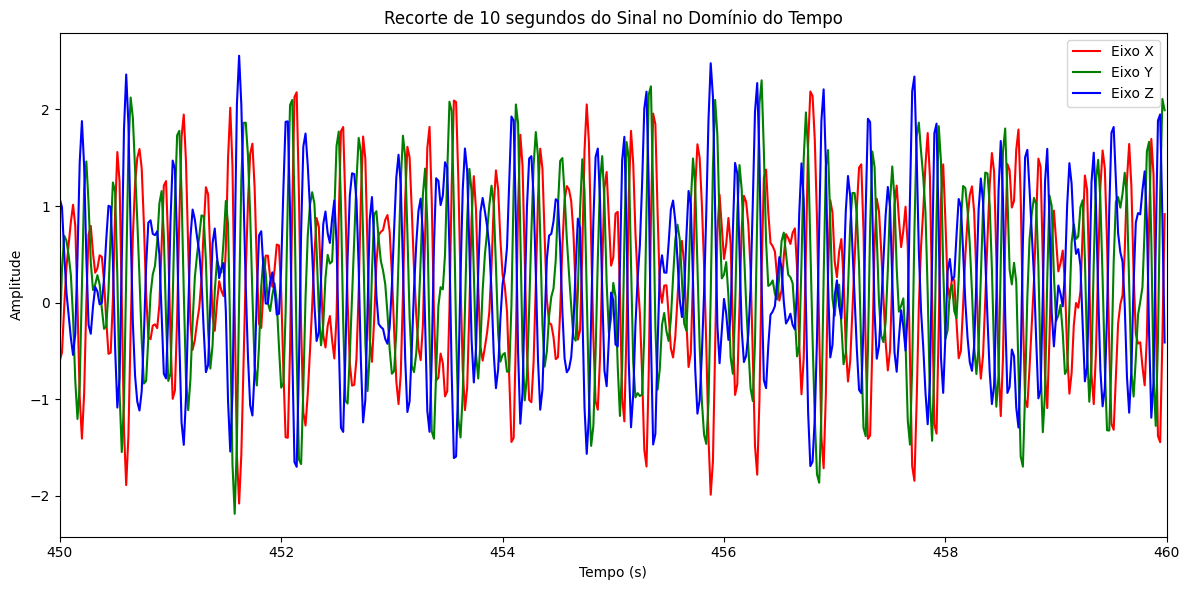

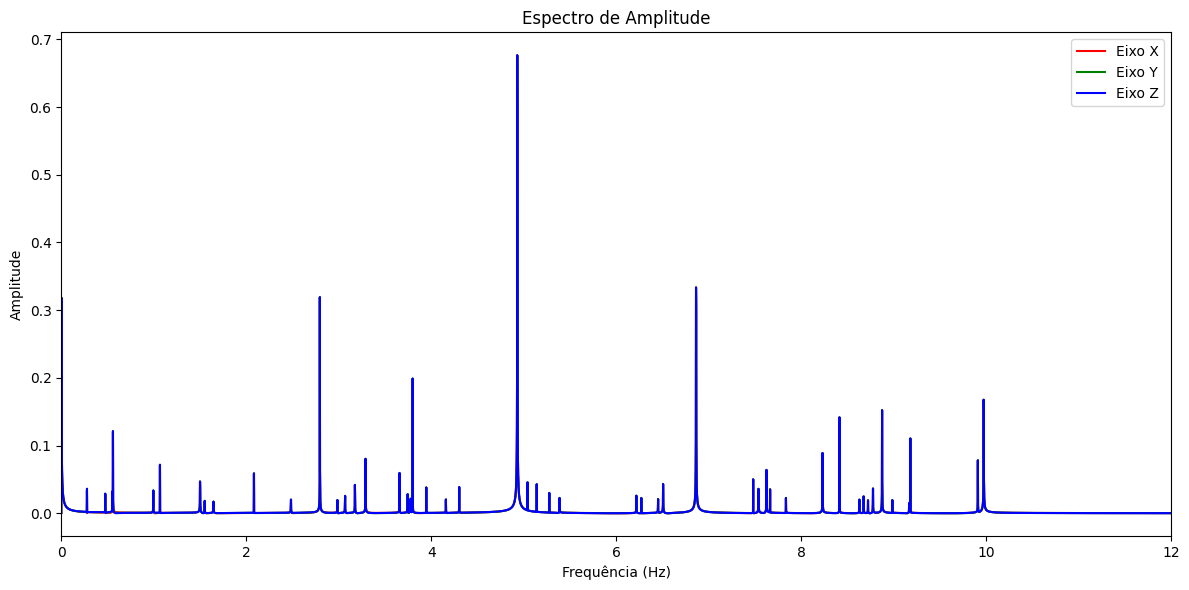

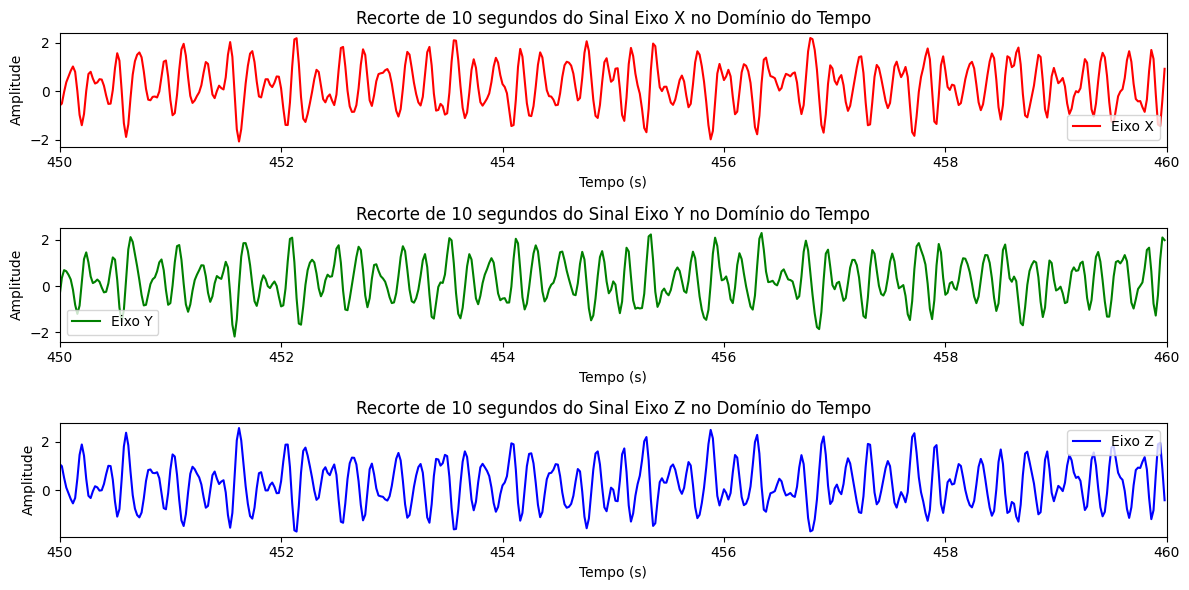

In [22]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

# simulation parameters
srate = 50  # in Hz
npnts = srate * 612  # 612 seconds
time = np.arange(0, npnts) / srate

# Generate 30 random frequencies in the range 0.1 to 10 Hz
num_freqs = 50
frex = np.random.uniform(0.1, 10, num_freqs)

# Criação de tendência linear para simular drift
trend = np.linspace(-0.5, 0.5, len(time))

signal_x = np.zeros(len(time))
signal_y = np.zeros(len(time))
signal_z = np.zeros(len(time))

# loop over frequencies to create signal
for fi in range(0, len(frex)):
    signal_x = signal_x + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time)
    signal_y = signal_y + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time + np.pi/2)  # Fase de 90 graus para eixo y
    signal_z = signal_z + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time + np.pi)  # Fase de 180 graus para eixo z

# Adicionando tendência aos sinais
signal_x = signal_x + trend
signal_y = signal_y + trend
signal_z = signal_z + trend

# amplitude spectrum via Fourier transform
signalX_x = scipy.fftpack.fft(signal_x)
signalX_y = scipy.fftpack.fft(signal_y)
signalX_z = scipy.fftpack.fft(signal_z)

signalAmp_x = 2 * np.abs(signalX_x) / npnts
signalAmp_y = 2 * np.abs(signalX_y) / npnts
signalAmp_z = 2 * np.abs(signalX_z) / npnts

# vector of frequencies in Hz
hz = np.linspace(0, srate / 2, int(np.floor(npnts / 2) + 1))

# Recorte de 10 segundos do sinal
start_index = 450 * srate
end_index = 460 * srate

time_cut = time[start_index:end_index]
signal_x_cut = signal_x[start_index:end_index]
signal_y_cut = signal_y[start_index:end_index]
signal_z_cut = signal_z[start_index:end_index]

# Plotar os sinais no domínio do tempo
plt.figure(figsize=(12, 6))
plt.plot(time_cut, signal_x_cut, label='Eixo X', color='r')
plt.plot(time_cut, signal_y_cut, label='Eixo Y', color='g')
plt.plot(time_cut, signal_z_cut, label='Eixo Z', color='b')
plt.title('Recorte de 10 segundos do Sinal no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(450, 460)
plt.legend()
plt.tight_layout()
plt.show()

# Plotar os espectros de amplitude
plt.figure(figsize=(12, 6))
plt.plot(hz, signalAmp_x[:len(hz)], label='Eixo X', color='r')
plt.plot(hz, signalAmp_y[:len(hz)], label='Eixo Y', color='g')
plt.plot(hz, signalAmp_z[:len(hz)], label='Eixo Z', color='b')
plt.title('Espectro de Amplitude')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 12)
plt.legend()
plt.tight_layout()
plt.show()

# Plotar os sinais individuais no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time_cut, signal_x_cut, label='Eixo X', color='r')
plt.title('Recorte de 10 segundos do Sinal Eixo X no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(450, 460)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_cut, signal_y_cut, label='Eixo Y', color='g')
plt.title('Recorte de 10 segundos do Sinal Eixo Y no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(450, 460)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_cut, signal_z_cut, label='Eixo Z', color='b')
plt.title('Recorte de 10 segundos do Sinal Eixo Z no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(450, 460)
plt.legend()

plt.tight_layout()
plt.show()


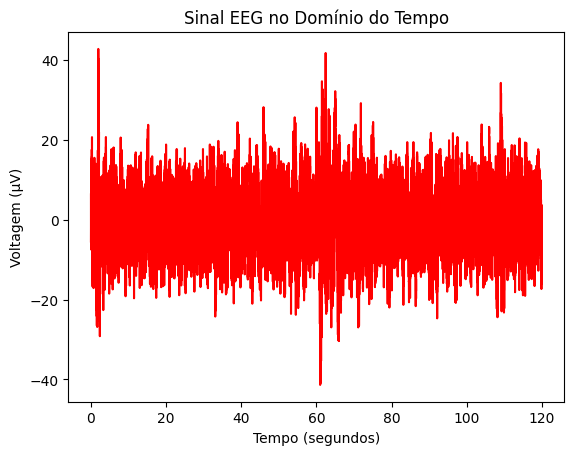

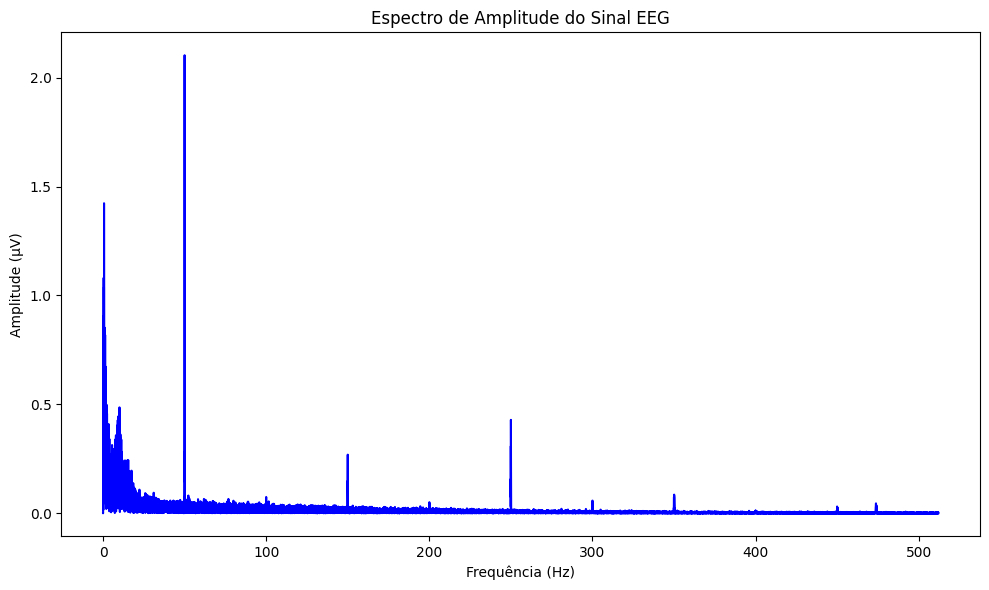

In [29]:
import numpy as np
import scipy.io as sio
import scipy.fftpack
import matplotlib.pyplot as plt

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState.mat')
eegdata = matdat['eegdata'][0]
srate = matdat['srate'][0][0]

# Vetor de tempo
N = len(eegdata)
timevec = np.arange(0, N) / srate

# Plotar os dados
plt.plot(timevec, eegdata, 'r')  # Alteração da cor para vermelho
plt.xlabel('Tempo (segundos)')
plt.ylabel('Voltagem (µV)')
plt.title('Sinal EEG no Domínio do Tempo')
plt.show()

# Calcular a transformada de Fourier do sinal
signalX = scipy.fftpack.fft(eegdata)
signalAmp = 2 * np.abs(signalX) / N

# Vetor de frequências em Hz
hz = np.linspace(0, srate / 2, int(np.floor(N / 2) + 1))

# Plotar o espectro de amplitude
plt.figure(figsize=(10, 6))
plt.plot(hz, signalAmp[:len(hz)], 'b')  # Alteração da cor para azul
plt.title('Espectro de Amplitude do Sinal EEG')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (µV)')
plt.tight_layout()
plt.show()


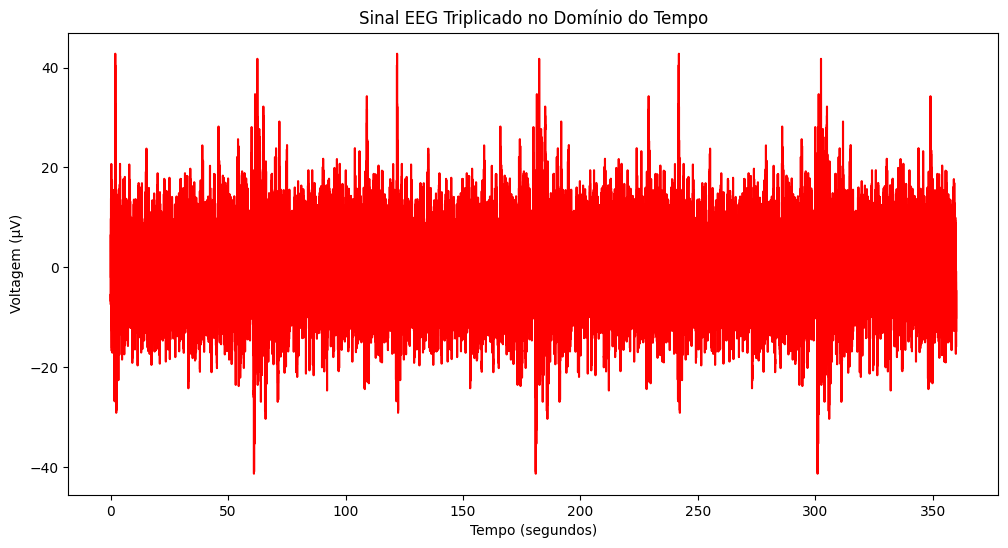

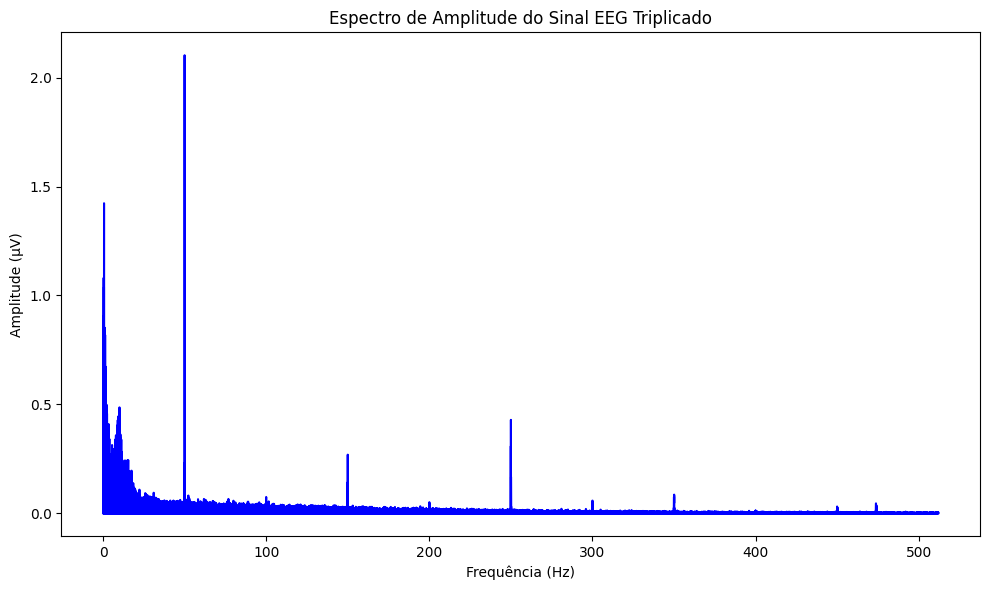

In [30]:
import numpy as np
import scipy.io as sio
import scipy.fftpack
import matplotlib.pyplot as plt

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState.mat')
eegdata = matdat['eegdata'][0]
srate = matdat['srate'][0][0]

# Triplicar os dados
eegdata_triplicado = np.concatenate([eegdata, eegdata, eegdata])
srate_triplicado = srate

# Salvar os dados triplicados em um novo arquivo .mat
matdat_triplicado = {'eegdata': eegdata_triplicado, 'srate': srate_triplicado}
sio.savemat('EEGrestingState_triplicado.mat', matdat_triplicado)

# Vetor de tempo para os dados triplicados
N = len(eegdata_triplicado)
timevec_triplicado = np.arange(0, N) / srate_triplicado

# Plotar os dados triplicados
plt.figure(figsize=(12, 6))
plt.plot(timevec_triplicado, eegdata_triplicado, 'r')  # Alteração da cor para vermelho
plt.xlabel('Tempo (segundos)')
plt.ylabel('Voltagem (µV)')
plt.title('Sinal EEG Triplicado no Domínio do Tempo')
plt.show()

# Calcular a transformada de Fourier dos dados triplicados
signalX_triplicado = scipy.fftpack.fft(eegdata_triplicado)
signalAmp_triplicado = 2 * np.abs(signalX_triplicado) / N

# Vetor de frequências em Hz para os dados triplicados
hz_triplicado = np.linspace(0, srate_triplicado / 2, int(np.floor(N / 2) + 1))

# Plotar o espectro de amplitude dos dados triplicados
plt.figure(figsize=(10, 6))
plt.plot(hz_triplicado, signalAmp_triplicado[:len(hz_triplicado)], 'b')  # Alteração da cor para azul
plt.title('Espectro de Amplitude do Sinal EEG Triplicado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (µV)')
plt.tight_layout()
plt.show()
